### Creating an end to end solution


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)



/kaggle/input
/kaggle/input/chest-xray-pneumonia
/kaggle/input/chest-xray-pneumonia/chest_xray
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train
/kaggle/input/chest-xray-pneumonia/chest_xray/

In [2]:
root_dir = "../input/chest-xray-pneumonia/chest_xray"

In [3]:
!dir {root_dir}

__MACOSX  chest_xray  test  train  val


### installing fastai dependencies


In [4]:
!pip install fastbook

     |████████████████████████████████| 719 kB 533 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 46 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 84 kB 996 kB/s eta 0:00:011     |███████████████▌                | 40 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 2.3 MB/s  eta 0:00:01


     |████████████████████████████████| 45 kB 2.0 MB/s eta 0:00:011
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.91
    Uninstalling sentencepiece-0.1.91:
      Successfully uninstalled sentencepiece-0.1.91
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.0 requires fastcore>=1.0.15, but you'll have fastcore 1.0.13 which is incompatible.


In [5]:
from fastbook import *
from fastai.vision.widgets import *

### creating dataloaders object

First task is to always create a dataloaders class, you can refer to fastbook lesson 2 for bear classifiers to get more in depth knowledge about this topic. https://github.com/fastai/fastbook

In [6]:
path = Path(root_dir +'/test')

In [7]:
path.ls()

(#2) [Path('../input/chest-xray-pneumonia/chest_xray/test/NORMAL'),Path('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA')]

In [8]:
data = DataBlock( blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                get_y = parent_label,
                item_tfms = Resize(224),
                splitter = RandomSplitter(valid_pct=0.2,seed=42)
                )

dls = data.dataloaders(path)
# we need to think about how to incorporate validation set here

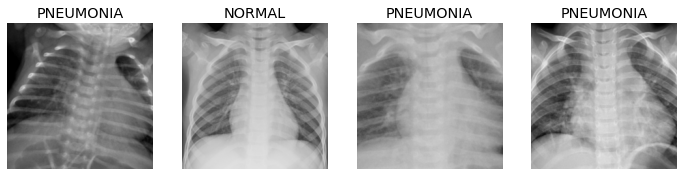

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

# It is better to spend some more time here maybe working with the data
# and finding out what lighting to use, but I feel xrays look more or 
# less the same.

### creating a learner

Next step is to create a learner object, we can use cnn learner.

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.048158,2.221578,0.483871,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.529037,0.532691,0.209677,00:09
1,0.411167,0.390760,0.153226,00:10
2,0.328110,0.366126,0.145161,00:09
3,0.273321,0.318802,0.129032,00:09


### looking at learner

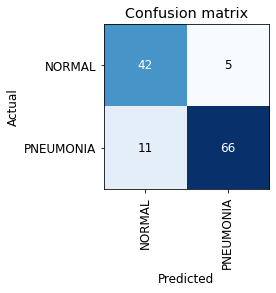

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

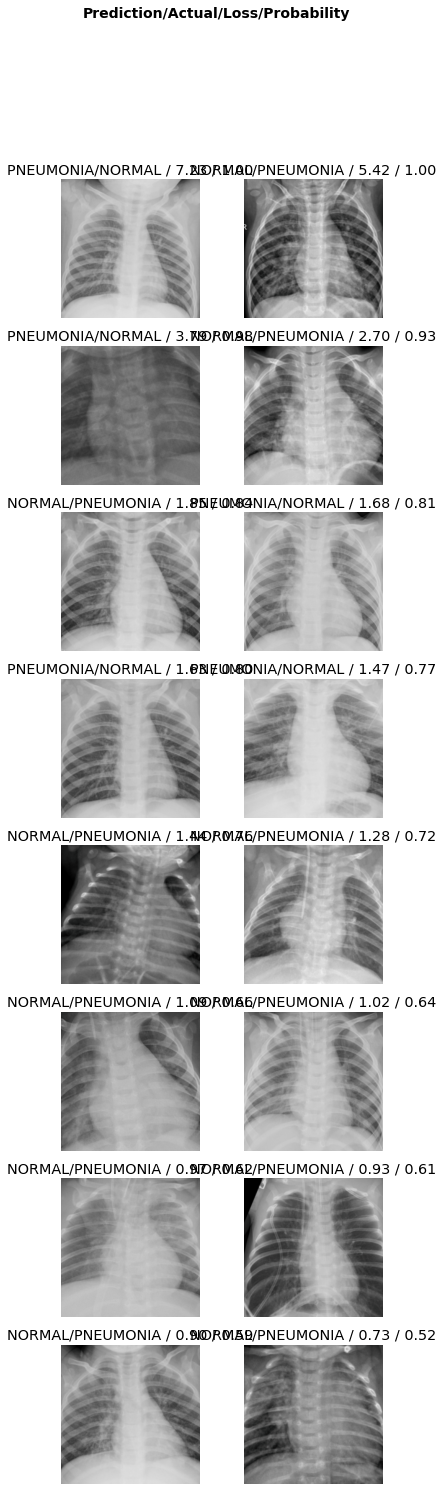

In [12]:
interp.plot_top_losses(16,nrows=8)

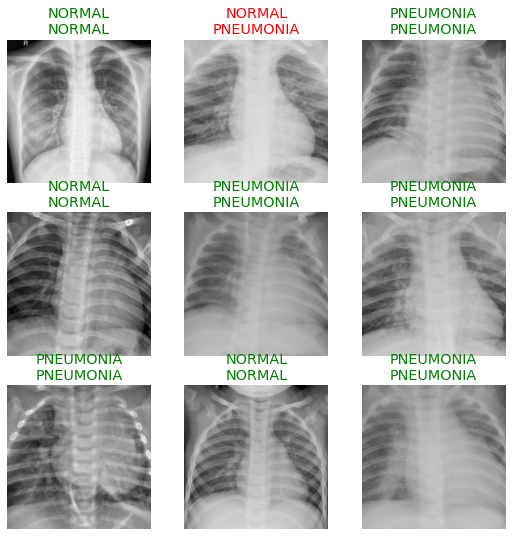

In [13]:
learn.show_results()

In [14]:
preds, _ =  learn.get_preds()
preds.shape

torch.Size([124, 2])

### predicting on test data

Suggestions welcome here.
 from : https://www.kaggle.com/krishnakalyan3/pneumonia-fastai-2-0-baseline

In [25]:
test_items = get_image_files(path/'test')
dl = learn.dls.test_dl(test_items, rm_type_tfms=1, bs=64)

In [26]:
learn,dl

(<fastai.learner.Learner at 0x7fd89c030990>,
 <fastai.data.core.TfmdDL at 0x7fd86d750dd0>)

In [28]:
print(learn.get_preds(dl=dl))

(None, None)


In [29]:
y_pred , _ = learn.get_preds()
#y_pred , _ = learn.get_preds(dl=dl) # not working for some reason
thresh = 0.5


In [30]:
#print(y_pred)

tensor([[7.6273e-01, 2.3727e-01],
        [9.9712e-01, 2.8840e-03],
        [3.3045e-02, 9.6695e-01],
        [9.3301e-01, 6.6988e-02],
        [1.0000e+00, 2.5152e-08],
        [2.2578e-02, 9.7742e-01],
        [5.3243e-05, 9.9995e-01],
        [9.9999e-01, 1.3707e-05],
        [1.0130e-02, 9.8987e-01],
        [9.9659e-01, 3.4083e-03],
        [9.9912e-01, 8.7549e-04],
        [9.9930e-01, 6.9651e-04],
        [9.9789e-01, 2.1063e-03],
        [1.0000e+00, 1.5539e-06],
        [5.4509e-02, 9.4549e-01],
        [9.1245e-01, 8.7551e-02],
        [1.0000e+00, 1.3791e-07],
        [1.0454e-03, 9.9895e-01],
        [7.5856e-02, 9.2414e-01],
        [9.9928e-01, 7.2136e-04],
        [6.6489e-01, 3.3511e-01],
        [2.9690e-03, 9.9703e-01],
        [9.9409e-01, 5.9110e-03],
        [9.8208e-01, 1.7917e-02],
        [2.4654e-02, 9.7535e-01],
        [9.9999e-01, 8.1956e-06],
        [6.4924e-01, 3.5076e-01],
        [1.4460e-02, 9.8554e-01],
        [1.0000e+00, 5.2978e-08],
        [1.000

In [31]:
yhat_test = [' '.join([learn.dls.vocab[i] for i,p in enumerate(pred) if p > thresh]) 
             for pred in y_pred.numpy()]

In [32]:
y_test = list(map(lambda x:x.parents[0].name, test_items))

In [34]:
#results = pd.DataFrame({'target': y_test, 'pred': yhat_test})

In [35]:
#accuracy = results[results.target == results.pred].shape[0]/ results.shape[0]; accuracy